In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras import callbacks
from sklearn.metrics import accuracy_score
from os import listdir
from os.path import isfile, join

In [35]:
PATH = '/content/drive/MyDrive/Face Mask Dataset'

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)

In [5]:
train_dir = os.path.join(PATH, 'Train')

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

Found 10000 files belonging to 2 classes.


In [7]:
test_dir = os.path.join(PATH, 'Test')

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=False)

Found 992 files belonging to 2 classes.


In [8]:
validation_dir = os.path.join(PATH, 'Validation')

validation_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

Found 806 files belonging to 2 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['WithMask', 'WithoutMask']


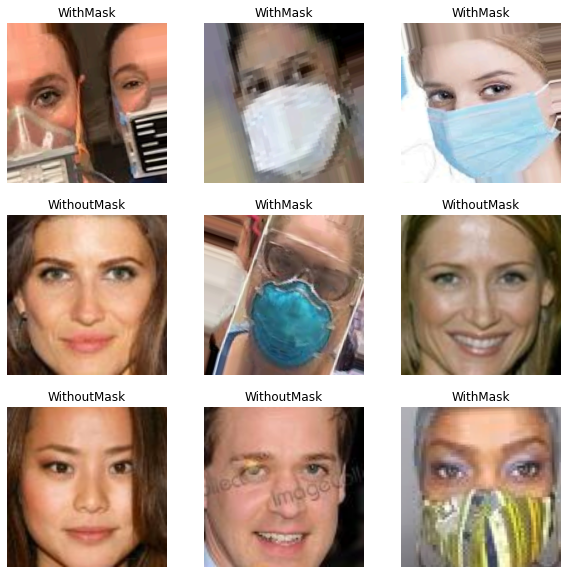

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #128x128
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #64x64
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #32x32
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #16x16
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [12]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 6, 
                                        restore_best_weights = True, verbose=1)

In [13]:
his = model.fit( train_ds,validation_data=validation_ds, epochs=5,callbacks =[earlystopping])

Epoch 1/5
313/313 [==============================] - 2272s 7s/step - loss: 0.1933 - accuracy: 0.9408 - val_loss: 0.0764 - val_accuracy: 0.9752
Epoch 2/5
313/313 [==============================] - 2082s 7s/step - loss: 0.0636 - accuracy: 0.9779 - val_loss: 0.0191 - val_accuracy: 0.9901
Epoch 3/5
313/313 [==============================] - 2037s 7s/step - loss: 0.0460 - accuracy: 0.9848 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 4/5
313/313 [==============================] - 2072s 7s/step - loss: 0.0295 - accuracy: 0.9898 - val_loss: 0.0293 - val_accuracy: 0.9876
Epoch 5/5
313/313 [==============================] - 2077s 7s/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.0485 - val_accuracy: 0.9839


In [ ]:
# get_acc =his .history['accuracy']
# value_acc =his .history['val_accuracy']
# get_loss = his.history['loss']
# validation_loss = his.history['val_loss']

# epochs = range(len(get_acc))
# plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
# plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
# plt.title('Training vs validation accuracy')
# plt.legend(loc=0)
# plt.figure()
# plt.show()